In [1]:
from Tools_Libraries import *
from IonModel_Libraries import *
from LimitSetting_Libraries import *
from WIMP_Libraries import *
from DP_Libraries import *
from Ultimate_Libraries import *
from Backgrounds_Libraries import *

Existing PoissonDataFile with 1000 precalculated values is used
test


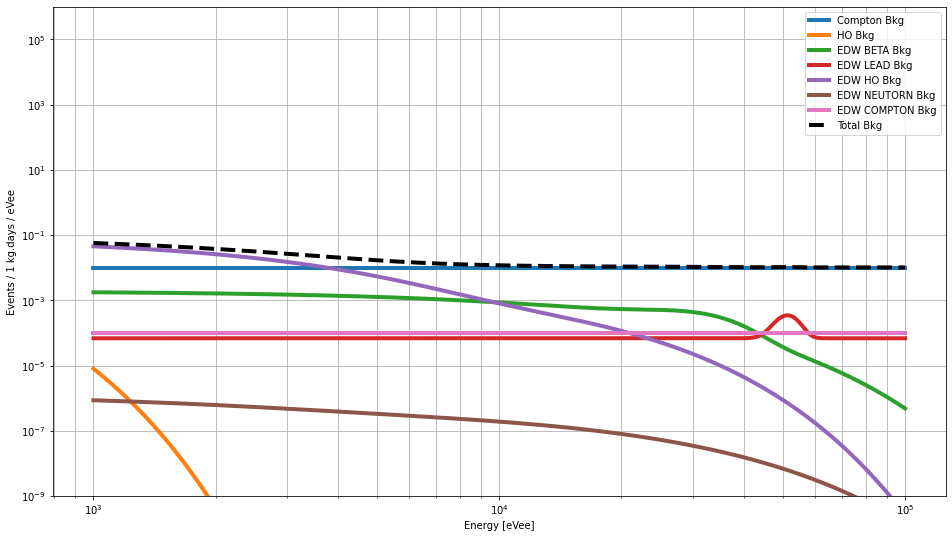

In [42]:
Exp = Experiment()
Exp.Voltage = 3
Exp.SigmaeV = 200
Exp.Exposure = 1
Exp.Fano = 0.2
Exp.TriggerNsigma = 3

Energyscale = "eVee"
EminAnalysis = 1000 
EmaxAnalysis = 100e3
nptx = 1000 # precision of the analysis, the higher the better, but slower
OR = Oracle(EminAnalysis,EmaxAnalysis,nptx)

# get analysis range to determine the  energy range for the plot
Emin, Emax = OR.GetAnalysisRange()
nptx = OR.GetAnalysisNptx()
logx = True
x = np.linspace(Emin,Emax,nptx) if logx==False else np.logspace(np.log10(Emin),np.log10(Emax),nptx)

# now that we have extracted the energy range for the plot, we can set the analysis threshold at NTriggerSigma * Sigma
Emin = Exp.TriggerNsigma*Exp.SigmaeV if (Energyscale=="eV") else Exp.TriggerNsigma*Exp.SigmaeVee
OR.SetAnalysisRange((Emin,Emax))
# define background components
Compton = Spectrum("ER",Exp)
Compton.SetFunc(lambda x: np.ones_like(x)*1e-2,0,1e9)
ComptonEnergySpectrum = Compton.GetEphononSmearedFunc(Energyscale,quantized=False)

HeatOnly = Spectrum("HO",Exp)
HeatOnly.SetFunc(fonctionHOdivided1000,0,1e9)
HeatOnlyEnergySpectrum = HeatOnly.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWBeta = Spectrum("BETA",Exp)
EDWBeta.SetFunc(lambda x: EDWfuncBETA(x,scale = "eV",norm=1),0,1e9)
EDWBetaEnergySpectrum =  EDWBeta.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWLead = Spectrum("LEAD",Exp)
EDWLead.SetFunc(lambda x: EDWfuncLEAD(x,scale = "eV",norm=1),0,1e9)
EDWLeadEnergySpectrum =  EDWLead.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWHO = Spectrum("HO",Exp)
EDWHO.SetFunc(lambda x: EDWfuncHEATONLY(x,scale = "eV",norm=1),0,1e9)
EDWHOEnergySpectrum =  EDWHO.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWNeutron = Spectrum("NEUTRON",Exp)
EDWNeutron.SetFunc(lambda x: EDWfuncNEUTRON(x,scale = "eV",norm=1),0,1e9)
EDWNeutronEnergySpectrum =  EDWNeutron.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWCompton = Spectrum("COMPTON",Exp)
EDWCompton.SetFunc(lambda x: EDWfuncCOMPTON(x,scale = "eV",norm=1),0,1e9)
EDWComptonEnergySpectrum =  EDWCompton.GetEphononSmearedFunc(Energyscale,quantized=False)

EDWCompton = Spectrum("monoER",Exp)
EDWCompton.SetLine(lambda x: EDWfuncCOMPTON(x,scale = "eV",norm=1),0,1e9)
EDWComptonEnergySpectrum =  EDWCompton.GetEphononSmearedFunc(Energyscale,quantized=False)


OR.AddBackground(ComptonEnergySpectrum,"Compton Bkg")
OR.AddBackground(HeatOnlyEnergySpectrum,"HO Bkg")
OR.AddBackground(EDWBetaEnergySpectrum,"EDW BETA Bkg")
OR.AddBackground(EDWLeadEnergySpectrum,"EDW LEAD Bkg")
OR.AddBackground(EDWHOEnergySpectrum,"EDW HO Bkg")
OR.AddBackground(EDWNeutronEnergySpectrum,"EDW NEUTORN Bkg")
OR.AddBackground(EDWComptonEnergySpectrum,"EDW COMPTON Bkg")

fb = OR.GetTotalBackground()
fig, ax = plt.subplots(figsize=(16,9))

for name in OR.GetBackgroundNames():
    tf1 = OR.GetBackground(name)
    plt.plot(x,tf1(x),label=name,lw=4)

yb = fb(x)
ax.plot(x,yb,color="black",ls='--',label="Total Bkg",lw=4)       
ax.set_ylim(bottom=1e-9,top=1e6)
ax.set_yscale('log')

if logx:
    ax.set_xscale('log')

#ax.plot([], [],' ',label=title2)

ax.grid(which='both')
ax.set_xlabel("Energy [{}]".format(Energyscale))
ax.set_ylabel("Events / {} kg.days / {}".format(Exp.Exposure,Energyscale))
ax.legend(loc='upper right')


print("test")
